In [35]:
#Loading the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as py
import statsmodels as stat
import plotly as plot
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import matplotlib.dates as mdates



In [2]:
# Loading Dataset
file_path = '/kaggle/input/nvidia-corporation-nvda-stock-2020-to-2024/nvda_stock_data.csv'
nvidia = pd.read_csv(file_path)

In [37]:
# Summary Stats 
print(nvidia.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092 entries, 0 to 1091
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1092 non-null   object 
 1   Open       1092 non-null   float64
 2   High       1092 non-null   float64
 3   Low        1092 non-null   float64
 4   Close      1092 non-null   float64
 5   Adj Close  1092 non-null   float64
 6   Volume     1092 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 59.8+ KB
None


In [38]:
print(nvidia.describe())

              Open         High          Low        Close    Adj Close  \
count  1092.000000  1092.000000  1092.000000  1092.000000  1092.000000   
mean    254.334991   259.101096   249.356678   254.482093   254.270355   
std     190.789638   194.100961   186.902226   190.612159   190.685090   
min      50.025002    52.485001    45.169998    49.099998    48.935833   
25%     132.953754   134.927505   130.639996   133.048748   132.740437   
50%     187.599998   191.900002   183.885002   187.995003   187.759239   
75%     297.559990   304.597504   288.080002   295.994987   295.573479   
max     958.510010   974.000000   935.099976   950.020020   950.020020   

             Volume  
count  1.092000e+03  
mean   4.682122e+07  
std    1.869374e+07  
min    9.788400e+06  
25%    3.431215e+07  
50%    4.470295e+07  
75%    5.692440e+07  
max    1.543911e+08  


In [5]:
print(nvidia.head())

         Date       Open       High        Low      Close  Adj Close    Volume
0  2020-01-02  59.687500  59.977501  59.180000  59.977501  59.741245  23753600
1  2020-01-03  58.775002  59.457500  58.525002  59.017502  58.785023  20538400
2  2020-01-06  58.080002  59.317501  57.817501  59.264999  59.031548  26263600
3  2020-01-07  59.549999  60.442501  59.097500  59.982498  59.746220  31485600
4  2020-01-08  59.939999  60.509998  59.537498  60.095001  59.858280  27710800


In [6]:
# Finding unique values
print(nvidia.nunique())

Date         1092
Open         1079
High         1078
Low          1081
Close        1083
Adj Close    1087
Volume       1092
dtype: int64


In [7]:
# Checking for missing values 
print(nvidia.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


**Observation**: *We can see that our dataset is pretty clean as we dont need to treat any null values before proceeding with out preliminary EDA.*

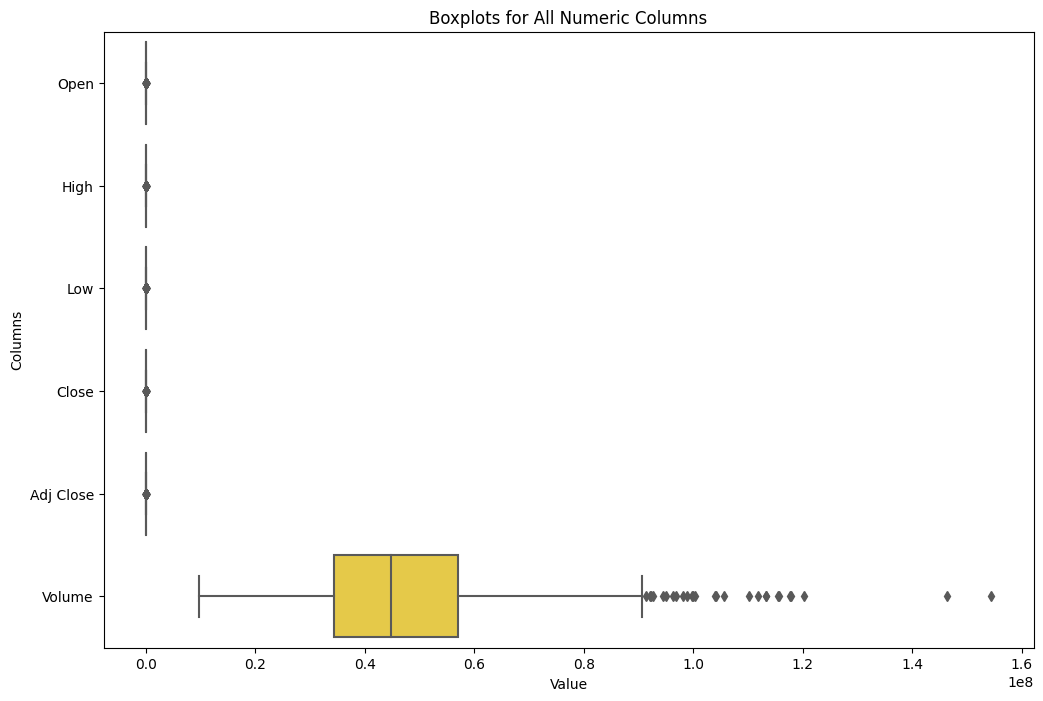

In [8]:
# Plotting boxplot to check for outliers

plt.figure(figsize=(12, 8))  
sns.boxplot(data=nvidia, orient="h", palette="Set2")  
plt.title('Boxplots for All Numeric Columns')
plt.xlabel('Value')
plt.ylabel('Columns')
plt.show()

***Here we can see we just need to treat the outliers in the Volume col.***

In [9]:
# Using IQR Method
Q1 = nvidia['Volume'].quantile(0.25)
Q3 = nvidia['Volume'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


nvidia_new = nvidia[(nvidia['Volume'] >= lower_bound)
                    & (nvidia['Volume'] <= upper_bound)]

Text(0, 0.5, 'Values')

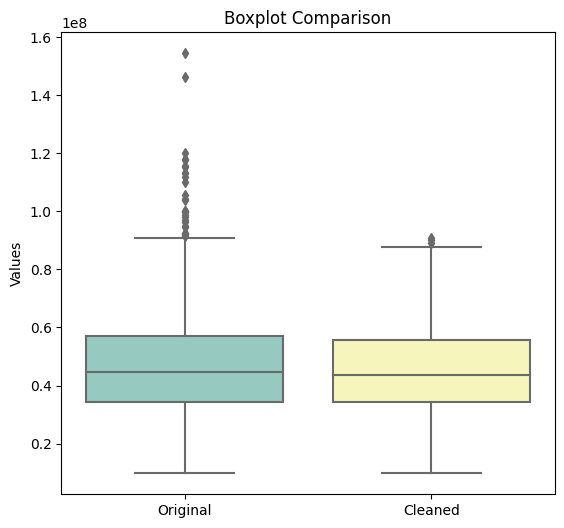

In [10]:

plt.figure(figsize=(14, 6))

# Boxplot comparison
plt.subplot(1, 2, 1)
sns.boxplot(data=[nvidia['Volume'], nvidia_new['Volume']], palette="Set3")
plt.title('Boxplot Comparison')
plt.xticks([0, 1], ['Original', 'Cleaned'])
plt.ylabel('Values')

# **EDA**

In [11]:
# Converting Date Column to datetime Format
nvidia_new['Date'] = pd.to_datetime(nvidia_new['Date'])
nvidia_new.set_index('Date', inplace=True)



/tmp/ipykernel_3775/1952754533.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nvidia_new['Date'] = pd.to_datetime(nvidia_new['Date'])


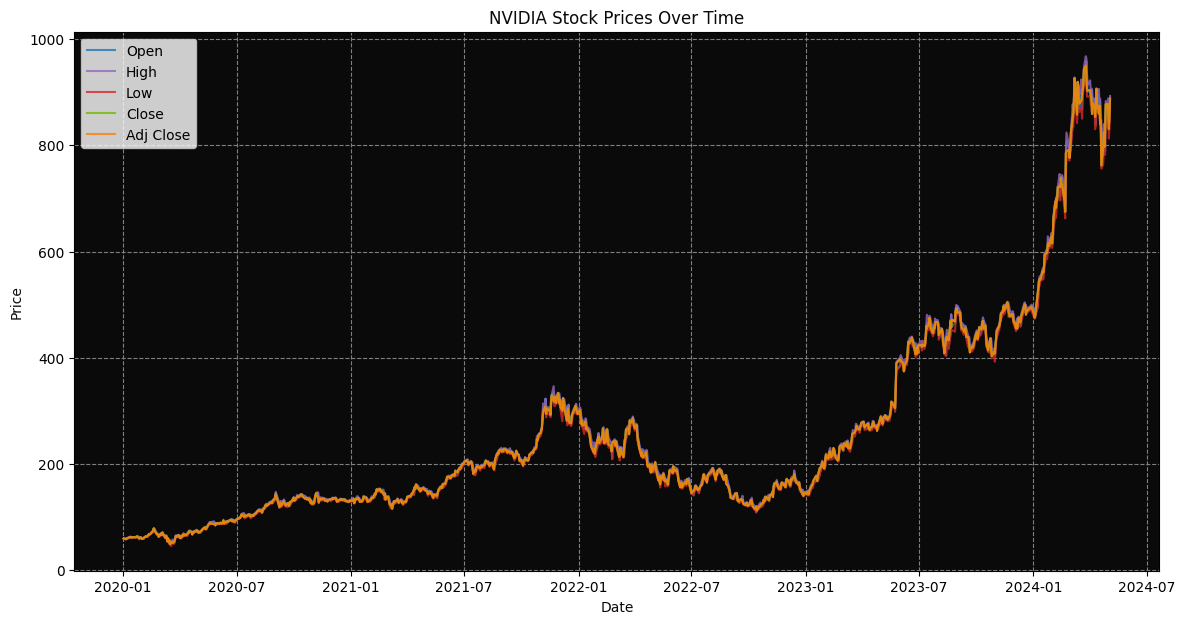

In [12]:
# Time Series Plots


nvidia_black = '#0A0A0A'  
nvidia_green = '#76B900'  
blue = '#1F77B4'          
violet = '#9467BD'      
red = '#D62728'           
orange = '#FF7F0E'        

# Create a dictionary 
colors = {
    'Open': blue,
    'High': violet,
    'Low': red,
    'Close': nvidia_green,
    'Adj Close': orange
}

# Plotting
plt.figure(figsize=(14, 7))
for column in ['Open', 'High', 'Low', 'Close', 'Adj Close']:
    plt.plot(nvidia_new.index, nvidia_new[column], label=column, color=colors[column], alpha=0.8)

plt.title('NVIDIA Stock Prices Over Time', color=nvidia_black)
plt.xlabel('Date', color=nvidia_black)
plt.ylabel('Price', color=nvidia_black)
plt.legend()
plt.grid(True, linestyle='--', color='gray') 
plt.gca().set_facecolor(nvidia_black)
plt.show()

/tmp/ipykernel_3775/2761672963.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nvidia_new['MA_15'] = nvidia_new['Close'].rolling(window=15).mean()
/tmp/ipykernel_3775/2761672963.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nvidia_new['MA_30'] = nvidia_new['Close'].rolling(window=30).mean()
/tmp/ipykernel_3775/2761672963.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

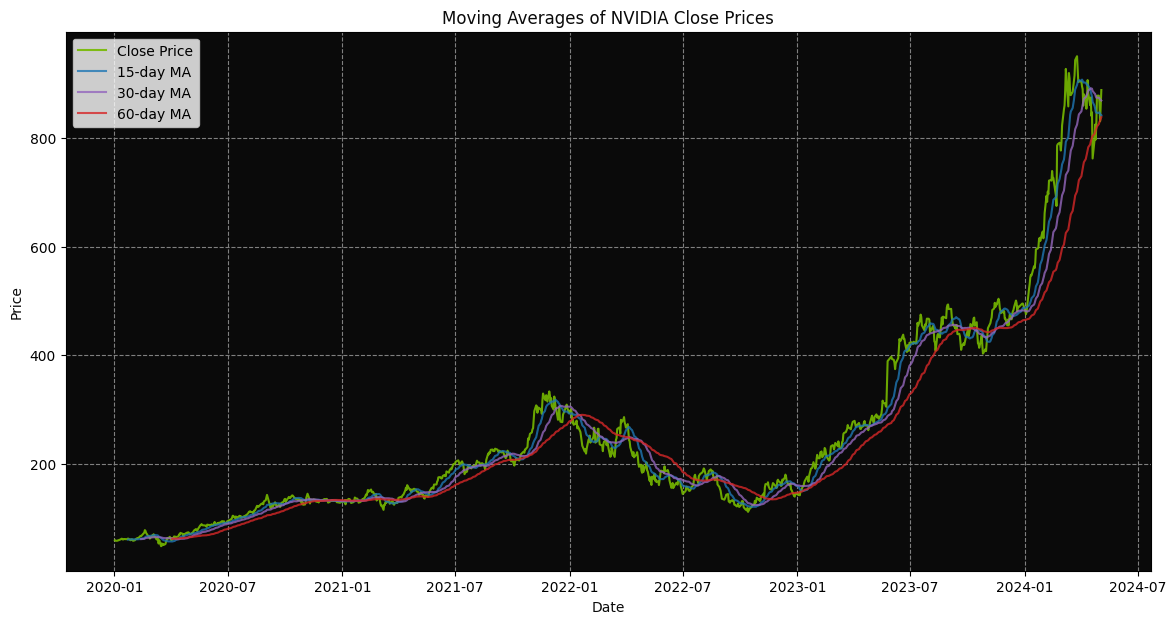

In [13]:
# Moving Averages 

nvidia_black = '#0A0A0A'  
nvidia_green = '#76B900'  
blue = '#1F77B4'          
violet = '#9467BD'       
red = '#D62728'           


# Calculating moving averages for the close prices
nvidia_new['MA_15'] = nvidia_new['Close'].rolling(window=15).mean()
nvidia_new['MA_30'] = nvidia_new['Close'].rolling(window=30).mean()
nvidia_new['MA_60'] = nvidia_new['Close'].rolling(window=60).mean()

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(nvidia_new.index, nvidia_new['Close'], label='Close Price', color=nvidia_green, alpha=0.9)
plt.plot(nvidia_new.index, nvidia_new['MA_15'], label='15-day MA', color=blue, alpha=0.8)
plt.plot(nvidia_new.index, nvidia_new['MA_30'], label='30-day MA', color=violet, alpha=0.8)
plt.plot(nvidia_new.index, nvidia_new['MA_60'], label='60-day MA', color=red, alpha=0.8)

plt.title('Moving Averages of NVIDIA Close Prices', color=nvidia_black)
plt.xlabel('Date', color=nvidia_black)
plt.ylabel('Price', color=nvidia_black)
plt.legend()
plt.grid(True, linestyle='--', color='gray')  # Lighter grid lines
plt.gca().set_facecolor(nvidia_black)
plt.show()



***We have taken 15,30 and 60 day moving averages for the stock. From here we can takeaway that the moving average technical indicator is a pretty reliable tool for predicting prices as there is very small margin of error. This is espicially true if used together with other technical indicators.***

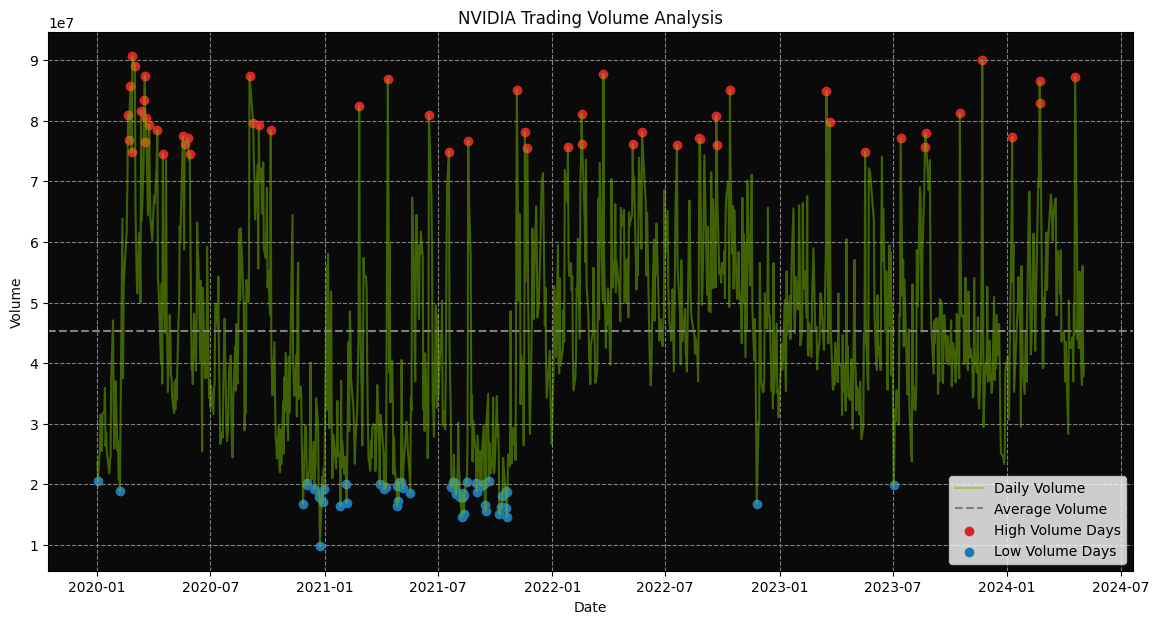

In [14]:
# Volume Analysis

nvidia_black = '#0A0A0A'  
nvidia_green = '#76B900'  
blue = '#1F77B4'          
red = '#D62728'

# Calculate the average daily trading volume
average_volume = nvidia_new['Volume'].mean()

# Identifying exceptionally high and low volume days
high_volume_days = nvidia_new[nvidia_new['Volume'] > nvidia_new['Volume'].quantile(0.95)]
low_volume_days = nvidia_new[nvidia_new['Volume'] < nvidia_new['Volume'].quantile(0.05)]

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(nvidia_new.index, nvidia_new['Volume'], label='Daily Volume', color=nvidia_green, alpha=0.5)
plt.axhline(y=average_volume, color='grey', linestyle='--', label='Average Volume')

# Highlight exceptionally high and low volume days
plt.scatter(high_volume_days.index, high_volume_days['Volume'], color=red, label='High Volume Days')
plt.scatter(low_volume_days.index, low_volume_days['Volume'], color=blue, label='Low Volume Days')

plt.title('NVIDIA Trading Volume Analysis', color=nvidia_black)
plt.xlabel('Date', color=nvidia_black)
plt.ylabel('Volume', color=nvidia_black)
plt.legend()
plt.grid(True, linestyle='--', color='gray')
plt.gca().set_facecolor(nvidia_black)
plt.show()


***We have calculated the average daily trading volumes to find out the the high-low in volume throughout the years. We can analyze days with unusual trading volumes and see how they compare to the average. We can spot trends and anomalies that may resulted due to some news or events taken place.***

/tmp/ipykernel_3775/2360374745.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nvidia_new['EMA_20'] = nvidia_new['Close'].ewm(span=20, adjust=False).mean()
/tmp/ipykernel_3775/2360374745.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nvidia_new['EMA_45'] = nvidia_new['Close'].ewm(span=45, adjust=False).mean()
/tmp/ipykernel_3775/2360374745.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

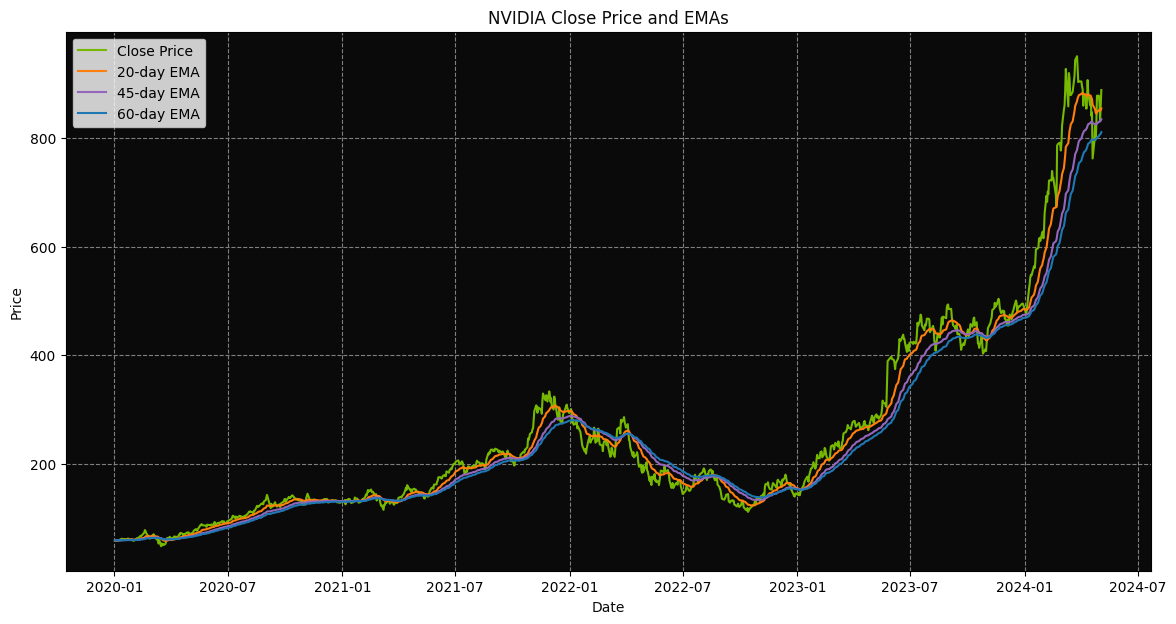

In [15]:
# Exponential Moving Averages(EMA)

nvidia_black = '#0A0A0A'
nvidia_green = '#76B900'
orange = '#FF7F0E'  
violet = '#9467BD'  
blue = '#1F77B4'  

# Calculate EMAs for Close price
nvidia_new['EMA_20'] = nvidia_new['Close'].ewm(span=20, adjust=False).mean()
nvidia_new['EMA_45'] = nvidia_new['Close'].ewm(span=45, adjust=False).mean()
nvidia_new['EMA_60'] = nvidia_new['Close'].ewm(span=60, adjust=False).mean()

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(nvidia_new.index, nvidia_new['Close'], label='Close Price', color=nvidia_green)
plt.plot(nvidia_new.index, nvidia_new['EMA_20'], label='20-day EMA', color=orange)
plt.plot(nvidia_new.index, nvidia_new['EMA_45'], label='45-day EMA', color=violet)
plt.plot(nvidia_new.index, nvidia_new['EMA_60'], label='60-day EMA', color=blue)

plt.title('NVIDIA Close Price and EMAs', color=nvidia_black)
plt.xlabel('Date', color=nvidia_black)
plt.ylabel('Price', color=nvidia_black)
plt.legend()
plt.grid(True, linestyle='--', color='gray')
plt.gca().set_facecolor(nvidia_black)
plt.show()


***We used EMA as well since exponential moving average tends to be more responsive to recent price changes, as compared to the simple moving average, which applies equal weight to all price changes , therefore this is more accurate and reliable.***

/tmp/ipykernel_3775/2857940833.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nvidia_new['RSI'] = compute_rsi(nvidia_new['Close'])


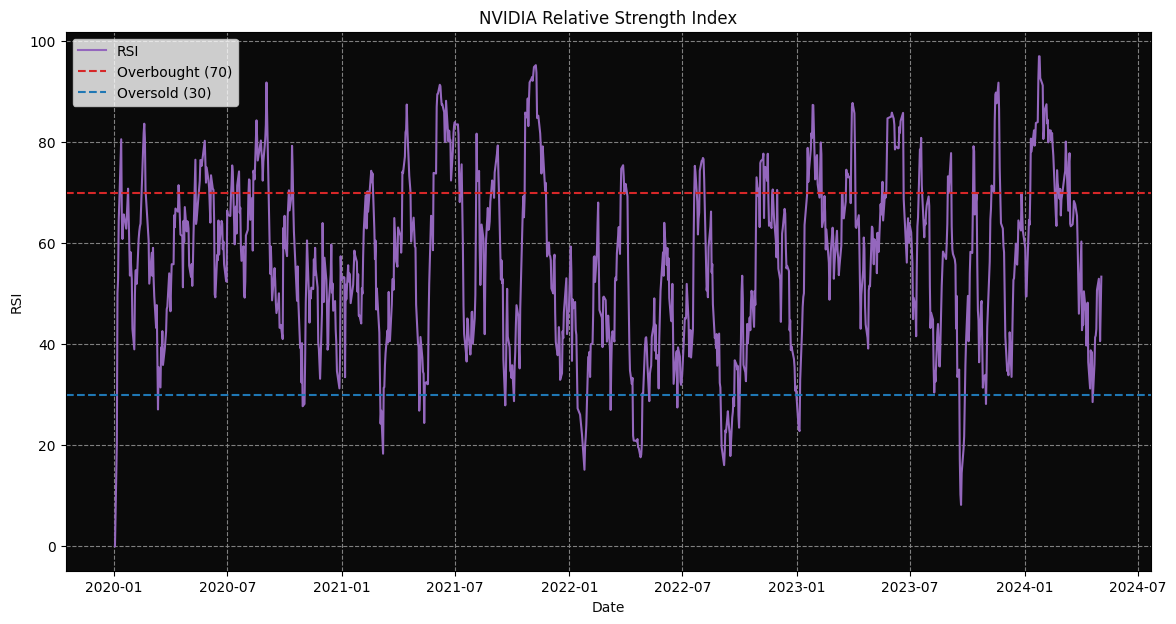

In [16]:
# RSI Indicator

# Function to determine relative strength of the stock
def compute_rsi(data, window=14):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).fillna(0)
    loss = (-delta.where(delta < 0, 0)).fillna(0)
    
    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()
    
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

nvidia_new['RSI'] = compute_rsi(nvidia_new['Close'])

# Plotting RSI
plt.figure(figsize=(14, 7))
plt.plot(nvidia_new.index, nvidia_new['RSI'], label='RSI', color=violet)
plt.axhline(70, color=red, linestyle='--', label='Overbought (70)')
plt.axhline(30, color=blue, linestyle='--', label='Oversold (30)')

plt.title('NVIDIA Relative Strength Index', color=nvidia_black)
plt.xlabel('Date', color=nvidia_black)
plt.ylabel('RSI', color=nvidia_black)
plt.legend()
plt.grid(True, linestyle='--', color='gray')
plt.gca().set_facecolor(nvidia_black)
plt.show()


***The RSI indicator can show a lot about the stock performance as a whole. It determines the strength of the stock in a dynamic market faced with uncertainity. We can notice that nvidia has stayed most of the period between the overbought and oversold range indicating that it is a very stable stock in the market and is less likely to react to sudden changes in the market.***

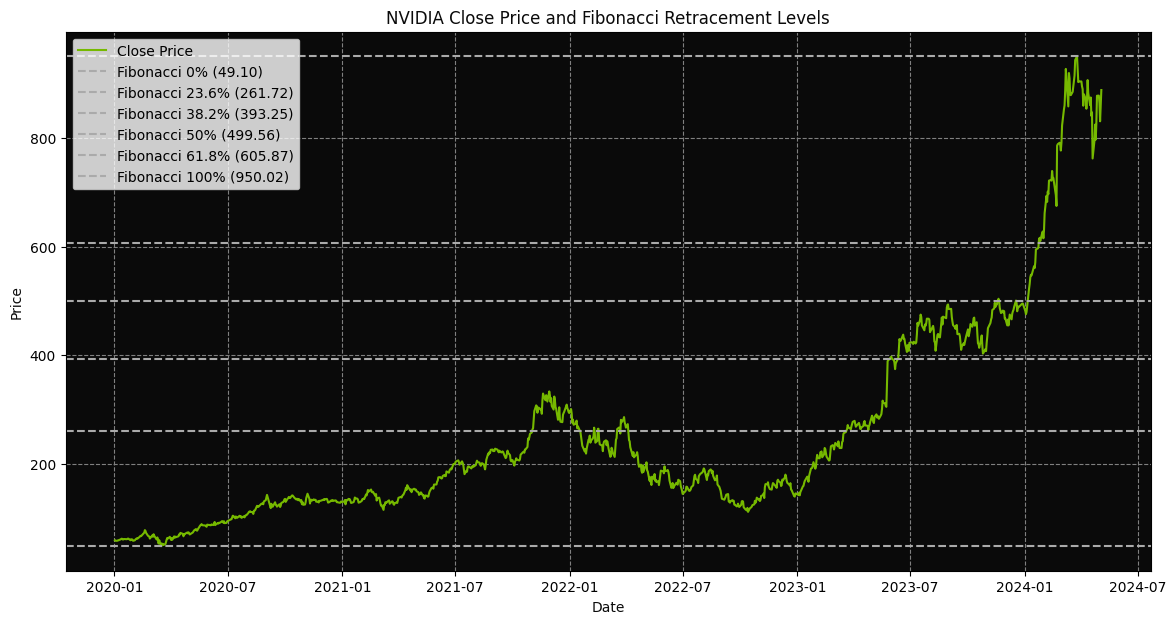

In [17]:
# fibonacci 
nvidia_black = '#0A0A0A'
nvidia_green = '#76B900'
gray = '#AAAAAA'  

# Define the major peak and trough
peak_price = nvidia_new['Close'].max()
trough_price = nvidia_new['Close'].min()
price_range = peak_price - trough_price

# Fibonacci Levels considering the trough as the start
fib_levels = [0, 0.236, 0.382, 0.5, 0.618, 1]
labels = ['0%', '23.6%', '38.2%', '50%', '61.8%', '100%']

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(nvidia_new.index, nvidia_new['Close'], label='Close Price', color=nvidia_green)

# Add Fibonacci levels
for i, ratio in enumerate(fib_levels):
    fib_price = trough_price + price_range * ratio
    plt.axhline(y=fib_price, color=gray, linestyle='--', label=f'Fibonacci {labels[i]} ({fib_price:.2f})')

plt.title('NVIDIA Close Price and Fibonacci Retracement Levels', color=nvidia_black)
plt.xlabel('Date', color=nvidia_black)
plt.ylabel('Price', color=nvidia_black)
plt.legend()
plt.grid(True, linestyle='--', color='gray')
plt.gca().set_facecolor(nvidia_black)
plt.show()

***The fibonacci levels represented by the dotted lines  , show the price range that are most likely to either fall or go up. This can be a good metric to identify the trend of the stock and predict price ranges that are very likely to be met.***

/tmp/ipykernel_3775/1522489228.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nvidia_new['Middle Band'] = nvidia_new['Close'].rolling(window=20).mean()
/tmp/ipykernel_3775/1522489228.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nvidia_new['Upper Band'] = nvidia_new['Middle Band'] + (nvidia_new['Close'].rolling(window=20).std() * 2)
/tmp/ipykernel_3775/1522489228.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

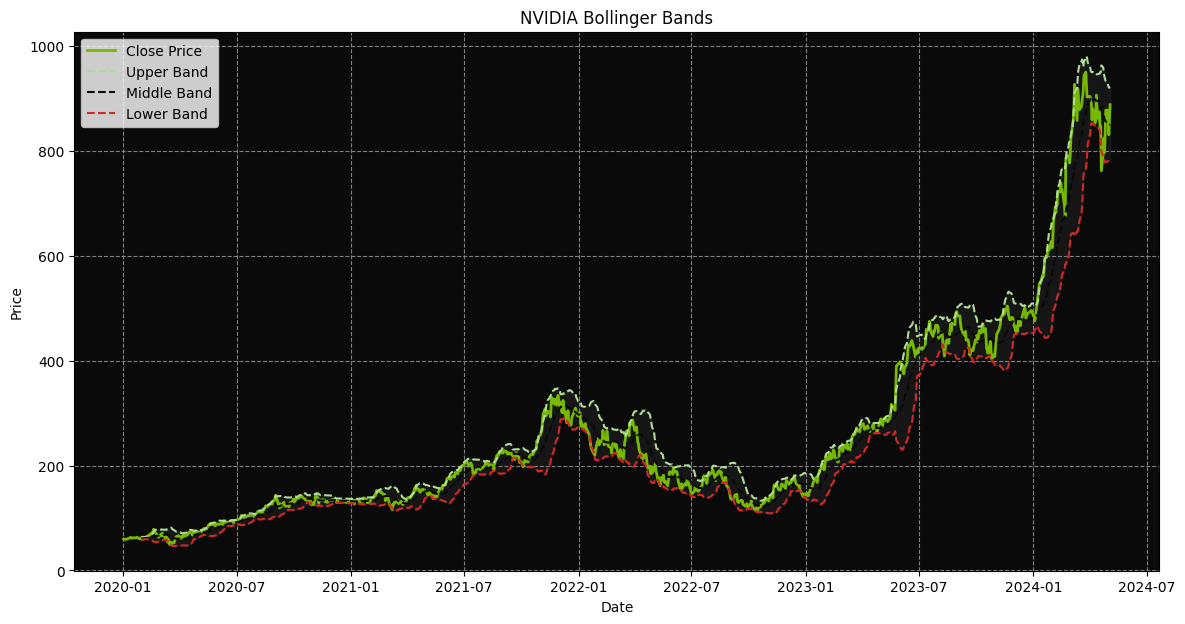

In [18]:
# Bollinger Bands

nvidia_black = '#0A0A0A'
nvidia_green = '#76B900'
light_green = '#AEDB95' 


# Calculate Bollinger Bands
nvidia_new['Middle Band'] = nvidia_new['Close'].rolling(window=20).mean()
nvidia_new['Upper Band'] = nvidia_new['Middle Band'] + (nvidia_new['Close'].rolling(window=20).std() * 2)
nvidia_new['Lower Band'] = nvidia_new['Middle Band'] - (nvidia_new['Close'].rolling(window=20).std() * 2)

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(nvidia_new.index, nvidia_new['Close'], label='Close Price', color=nvidia_green, linewidth=2)
plt.plot(nvidia_new.index, nvidia_new['Upper Band'], label='Upper Band', color=light_green, linestyle='--')
plt.plot(nvidia_new.index, nvidia_new['Middle Band'], label='Middle Band', color=nvidia_black, linestyle='--')
plt.plot(nvidia_new.index, nvidia_new['Lower Band'], label='Lower Band', color=red, linestyle='--')

plt.fill_between(nvidia_new.index, nvidia_new['Upper Band'], nvidia_new['Lower Band'], color='gray', alpha=0.1)

plt.title('NVIDIA Bollinger Bands', color=nvidia_black)
plt.xlabel('Date', color=nvidia_black)
plt.ylabel('Price', color=nvidia_black)
plt.legend()
plt.grid(True, linestyle='--', color='gray')
plt.gca().set_facecolor(nvidia_black)
plt.show()

***Bollinger bands over here can help us understand when the stock price of nvidia is most likely to pick up or drop based on the deviations in the prices in the market. This can be used together with RSI , EMA & MA.***

# **Model - Building**

***We will start of with our baseline model which will be linear regression***

# **Linear Regression**

In [19]:


# Taking Lag of prev. day closing price and predicting 
nvidia_new['Lag1'] = nvidia_new['Close'].shift(1)
nvidia_new.dropna(inplace=True)  

# Define features and target
X = nvidia_new[['Lag1']]  
y = nvidia_new['Close']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create and fit the model
model = LinearRegression()
model.fit(X_train, y_train)





/tmp/ipykernel_3775/24846637.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nvidia_new['Lag1'] = nvidia_new['Close'].shift(1)
/tmp/ipykernel_3775/24846637.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nvidia_new.dropna(inplace=True)


LinearRegression()

# **Predicting Results( Linear Regression)**

In [22]:
#predictions
predictions = model.predict(X_test)

# **Evaluating Linear Regression Model**

In [32]:
# Calculate MSE, RMSE, and R-squared
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared (Accuracy): {r2:.2%}")

Mean Squared Error: 115.33
Root Mean Squared Error: 10.74
R-squared (Accuracy): 0.33%


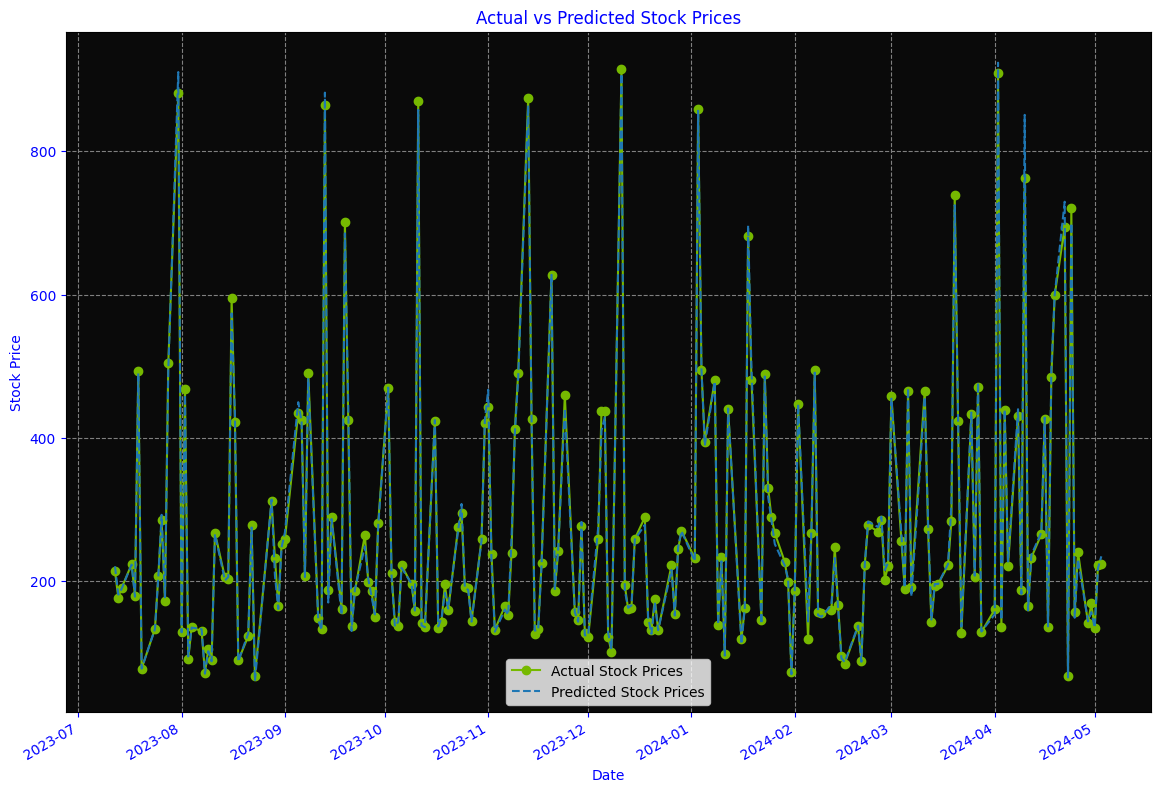

In [26]:


nvidia_black = '#0A0A0A'  
nvidia_green = '#76B900'  
predicted_blue = '#1F77B4'  

# Plotting
plt.figure(figsize=(14, 10))
plt.plot(nvidia_new.index[-len(y_test):], y_test, label='Actual Stock Prices', color=nvidia_green, marker='o')
plt.plot(nvidia_new.index[-len(y_test):], predictions, label='Predicted Stock Prices', color=predicted_blue, linestyle='--')

plt.title('Actual vs Predicted Stock Prices', color='blue')
plt.xlabel('Date', color='blue')
plt.ylabel('Stock Price', color='blue')
plt.legend()
plt.grid(True, linestyle='--', color='gray')

plt.gca().set_facecolor(nvidia_black)
plt.gca().tick_params(axis='x', colors='blue')
plt.gca().tick_params(axis='y', colors='blue')
plt.gcf().autofmt_xdate()  # Auto formats the date labels for better readability

plt.show()


# **LSTM Model**

# **Creating LSTM Network**

In [27]:

# Normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(nvidia_new['Close'].values.reshape(-1,1))

# Split into train and test sets
train_size = int(len(scaled_data) * 0.67)
test_size = len(scaled_data) - train_size
train, test = scaled_data[0:train_size,:], scaled_data[train_size:len(scaled_data),:]

# Convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 1
X1_train, y1_train = create_dataset(train, look_back)
X1_test, y1_test = create_dataset(test, look_back)

# Reshape input 
X1_train = np.reshape(X1_train, (X1_train.shape[0], 1, X1_train.shape[1]))
X1_test = np.reshape(X1_test, (X1_test.shape[0], 1, X1_test.shape[1]))

# Build and compile the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X1_train, y1_train, epochs=100, batch_size=1, verbose=2)



Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


672/672 - 3s - 4ms/step - loss: 0.0031
Epoch 2/100
672/672 - 1s - 2ms/step - loss: 9.5881e-04
Epoch 3/100
672/672 - 1s - 2ms/step - loss: 1.4759e-04
Epoch 4/100
672/672 - 1s - 2ms/step - loss: 5.6645e-05
Epoch 5/100
672/672 - 1s - 2ms/step - loss: 5.8192e-05
Epoch 6/100
672/672 - 1s - 2ms/step - loss: 6.1273e-05
Epoch 7/100
672/672 - 1s - 1ms/step - loss: 6.2799e-05
Epoch 8/100
672/672 - 1s - 2ms/step - loss: 5.9418e-05
Epoch 9/100
672/672 - 1s - 1ms/step - loss: 6.2629e-05
Epoch 10/100
672/672 - 1s - 2ms/step - loss: 6.0879e-05
Epoch 11/100
672/672 - 1s - 2ms/step - loss: 5.8471e-05
Epoch 12/100
672/672 - 1s - 2ms/step - loss: 6.0744e-05
Epoch 13/100
672/672 - 1s - 1ms/step - loss: 6.3492e-05
Epoch 14/100
672/672 - 2s - 2ms/step - loss: 6.2919e-05
Epoch 15/100
672/672 - 2s - 3ms/step - loss: 6.1387e-05
Epoch 16/100
672/672 - 1s - 2ms/step - loss: 6.1268e-05
Epoch 17/100
672/672 - 1s - 1ms/step - loss: 5.8584e-05
Epoch 18/100
672/672 - 1s - 2ms/step - loss: 6.0624e-05
Epoch 19/100
672/

# **LSTM Predictions**

In [28]:
# Predictions
train_predict = model.predict(X1_train)
test_predict = model.predict(X1_test)

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


# **Inverting Predictions**

In [29]:
# Invert predictions
train_predict = scaler.inverse_transform(train_predict)
y1_train = scaler.inverse_transform([y1_train])
test_predict = scaler.inverse_transform(test_predict)
y1_test = scaler.inverse_transform([y1_test])

# Calculate root mean squared error
train_score = np.sqrt(mean_squared_error(y1_train[0], train_predict[:,0]))
print(f'Train Score: {train_score:.2f} RMSE')
test_score = np.sqrt(mean_squared_error(y1_test[0], test_predict[:,0]))
print(f'Test Score: {test_score:.2f} RMSE')


Train Score: 6.43 RMSE
Test Score: 56.45 RMSE


# **MAPE & LSTM Model Evaluation**

In [30]:
# Finding MAPE
def mean_absolute_percentage_error(y1_true, y1_pred): 
    y1_true, y1_pred = np.array(y1_true), np.array(y1_pred)
    return np.mean(np.abs((y1_true - y1_pred) / y1_true)) * 100

# Calculate MAPE
train_mape = mean_absolute_percentage_error(y1_train[0], train_predict[:,0])
test_mape = mean_absolute_percentage_error(y1_test[0], test_predict[:,0])

print(f'Train MAPE: {train_mape:.2f}%')
print(f'Test MAPE: {test_mape:.2f}%')

# Calculate "Accuracy" from MAPE
train_accuracy = 100 - train_mape
test_accuracy = 100 - test_mape
print(f'Train Accuracy: {train_accuracy:.2f}%')
print(f'Test Accuracy: {test_accuracy:.2f}%')


Train MAPE: 2.58%
Test MAPE: 5.37%
Train Accuracy: 97.42%
Test Accuracy: 94.63%


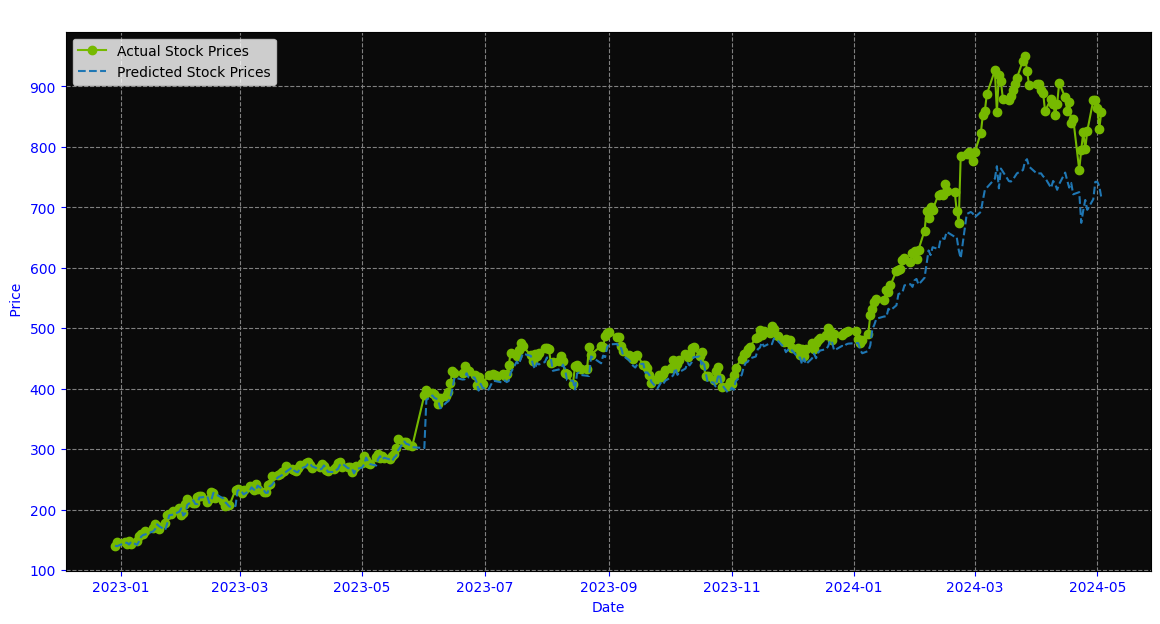

In [31]:
# Predicting Results
nvidia_black = '#0A0A0A'  
nvidia_green = '#76B900'  
predicted_blue = '#1F77B4'  

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(nvidia_new.index[-len(y1_test[0]):], y1_test[0], label='Actual Stock Prices', color=nvidia_green, marker='o')
plt.plot(nvidia_new.index[-len(test_predict[:,0]):], test_predict[:,0], label='Predicted Stock Prices', color=predicted_blue, linestyle='--')

plt.title('Comparison of Actual and Predicted Stock Prices', color='white')
plt.xlabel('Date', color='blue')
plt.ylabel(' Price', color='blue')
plt.legend()
plt.grid(True, linestyle='--', color='gray')
plt.gca().set_facecolor(nvidia_black)
plt.gca().tick_params(axis='x', colors='blue')
plt.gca().tick_params(axis='y', colors='blue')

# Show the plot
plt.show()

# This is the End of the Notebook . If you Liked it , Go ahead and give it an upvote! Also Please give any suggestions for Improvements , thanks!